In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import itertools
from wordcloud import WordCloud

def join_json_values(arrayValues):
    allValues = json.loads(arrayValues)
    joinedValues = ''
    for singleValue in allValues:
        joinedValues += singleValue['name']
        joinedValues += ','
    return joinedValues[:-1]

movies_df = pd.read_csv("tmdb_5000_movies.csv")
movies_df.dropna(subset=['overview'], inplace=True)
movies_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/j.okoroafor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/j.okoroafor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [2]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4800 non-null   int64  
 1   genres                4800 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4800 non-null   int64  
 4   keywords              4800 non-null   object 
 5   original_language     4800 non-null   object 
 6   original_title        4800 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4800 non-null   float64
 9   production_companies  4800 non-null   object 
 10  production_countries  4800 non-null   object 
 11  release_date          4799 non-null   object 
 12  revenue               4800 non-null   int64  
 13  runtime               4800 non-null   float64
 14  spoken_languages      4800 non-null   object 
 15  status               

In [3]:
import itertools
list_country = [x.split(', ') for x in movies_df.dropna(subset=['production_countries'])['production_countries'].tolist()]
list_country = list(itertools.chain(*list_country))

from collections import Counter
df_movies_country_count = pd.DataFrame(Counter(list_country).most_common()[:10], columns=['Country', 'Count'])

In [4]:
import itertools
list_company = [x.split(', ') for x in movies_df.dropna(subset=['production_companies'])['production_companies'].tolist()]
list_company = list(itertools.chain(*list_company))

from collections import Counter
df_movies_company_count = pd.DataFrame(Counter(list_company).most_common()[:10], columns=['Company', 'Count'])

In [5]:
import itertools
list_genre = [x.split(', ') for x in movies_df.dropna(subset=['genres'])['genres'].tolist()]
list_genre = list(itertools.chain(*list_genre))

from collections import Counter
df_movies_genre_count = pd.DataFrame(Counter(list_genre).most_common()[:10], columns=['Genre', 'Count'])

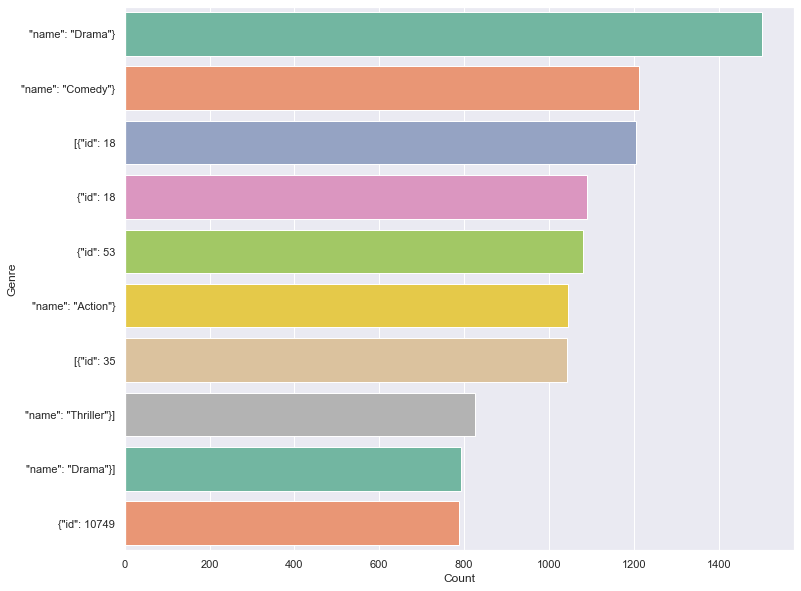

In [6]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.barplot(y="Genre", x='Count', data=df_movies_genre_count, palette="Set2", orient='h')

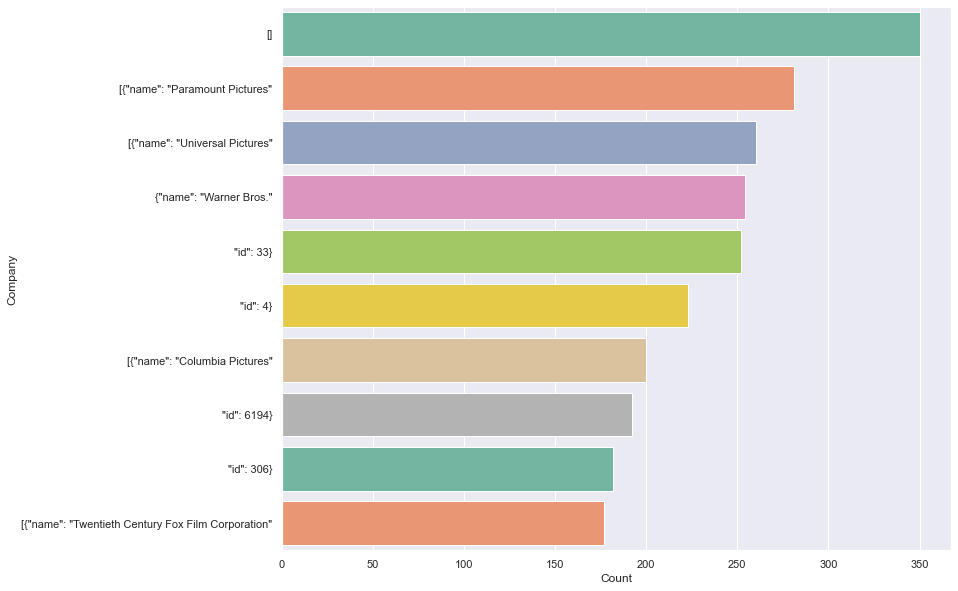

In [7]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.barplot(y="Company", x='Count', data=df_movies_company_count, palette="Set2", orient='h')

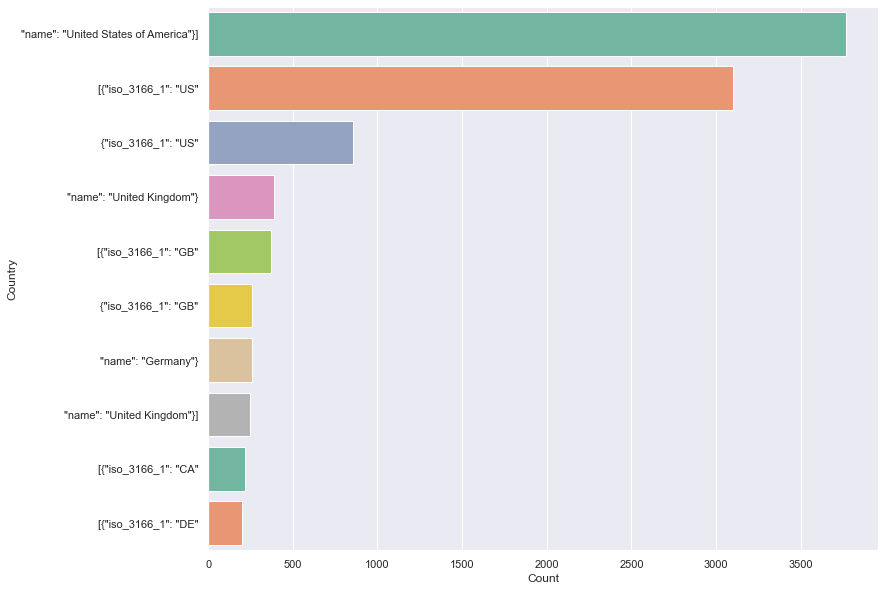

In [8]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.barplot(y="Country", x='Count', data=df_movies_country_count, palette="Set2", orient='h')

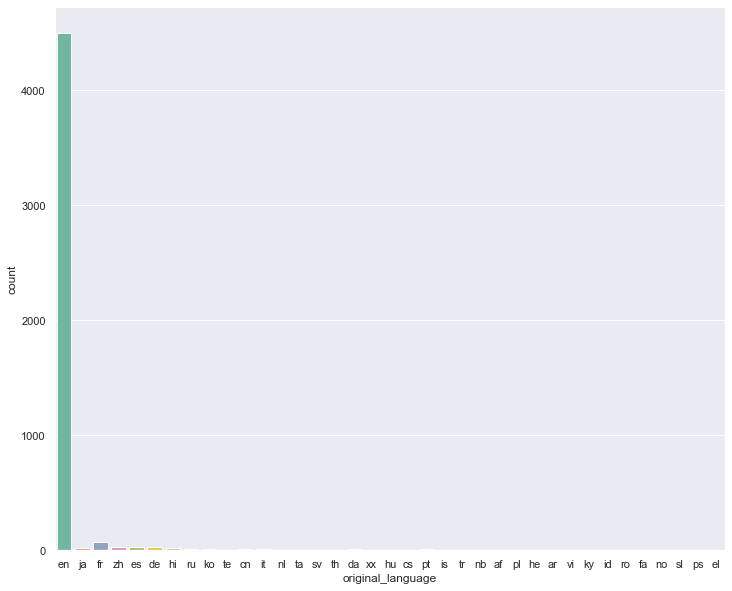

In [9]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="original_language", data=movies_df, palette="Set2")

In [10]:
import datetime
movies_df['year']=pd.DatetimeIndex(movies_df['release_date']).year

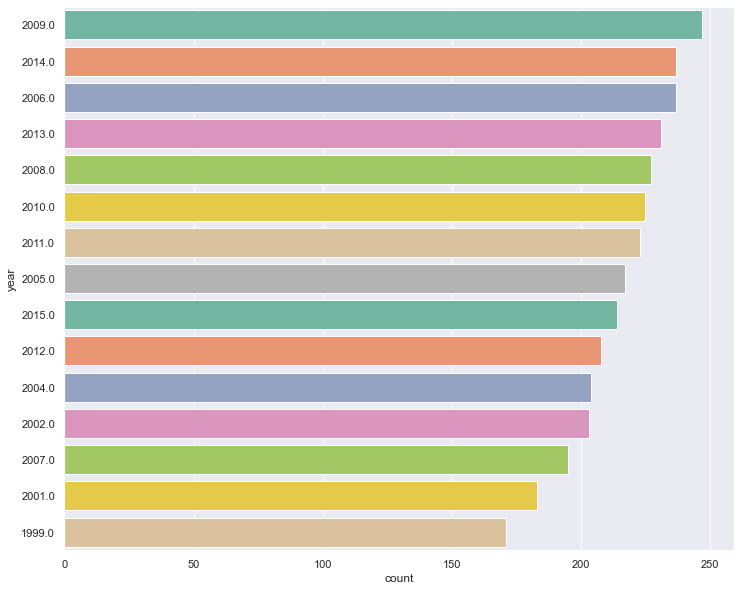

In [11]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='year', data=movies_df, palette="Set2", order=movies_df['year'].value_counts().index[0:15])

In [12]:
movies_df.drop(columns=['budget','year','homepage','original_language','popularity','original_title','production_companies','production_countries','release_date','revenue','runtime','spoken_languages','status','tagline','vote_count','vote_average'], inplace=True)
movies_df.head()

,genres,id,keywords,overview,title
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,Spectre
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Dark Knight Rises
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",John Carter


In [13]:
movies_df['title_list'] = movies_df['title'].str.lower()
movies_df['overview'] = movies_df['overview'].str.lower()
movies_df['genres'] = movies_df['genres'].apply(join_json_values).str.lower()
movies_df['keywords'] = movies_df['keywords'].apply(join_json_values).str.lower()
movies_df['genres'] = movies_df['genres'].str.lower()
movies_df['keywords'] = movies_df['keywords'].str.lower()
movies_df.head()

,genres,id,keywords,overview,title,title_list
0,"action,adventure,fantasy,science fiction",19995,"culture clash,future,space war,space colony,so...","in the 22nd century, a paraplegic marine is di...",Avatar,avatar
1,"adventure,fantasy,action",285,"ocean,drug abuse,exotic island,east india trad...","captain barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,pirates of the caribbean: at world's end
2,"action,adventure,crime",206647,"spy,based on novel,secret agent,sequel,mi6,bri...",a cryptic message from bond’s past sends him o...,Spectre,spectre
3,"action,crime,drama,thriller",49026,"dc comics,crime fighter,terrorist,secret ident...",following the death of district attorney harve...,The Dark Knight Rises,the dark knight rises
4,"action,adventure,science fiction",49529,"based on novel,mars,medallion,space travel,pri...","john carter is a war-weary, former military ca...",John Carter,john carter


In [14]:
movies_df['title_list'] = movies_df['title_list'].apply(word_tokenize)
movies_df['overview'] = movies_df['overview'].apply(word_tokenize)
movies_df['genres'] = movies_df['genres'].apply(word_tokenize)
movies_df['keywords'] = movies_df['keywords'].apply(word_tokenize)
movies_df.head()

,genres,id,keywords,overview,title,title_list
0,"[action, ,, adventure, ,, fantasy, ,, science,...",19995,"[culture, clash, ,, future, ,, space, war, ,, ...","[in, the, 22nd, century, ,, a, paraplegic, mar...",Avatar,[avatar]
1,"[adventure, ,, fantasy, ,, action]",285,"[ocean, ,, drug, abuse, ,, exotic, island, ,, ...","[captain, barbossa, ,, long, believed, to, be,...",Pirates of the Caribbean: At World's End,"[pirates, of, the, caribbean, :, at, world, 's..."
2,"[action, ,, adventure, ,, crime]",206647,"[spy, ,, based, on, novel, ,, secret, agent, ,...","[a, cryptic, message, from, bond, ’, s, past, ...",Spectre,[spectre]
3,"[action, ,, crime, ,, drama, ,, thriller]",49026,"[dc, comics, ,, crime, fighter, ,, terrorist, ...","[following, the, death, of, district, attorney...",The Dark Knight Rises,"[the, dark, knight, rises]"
4,"[action, ,, adventure, ,, science, fiction]",49529,"[based, on, novel, ,, mars, ,, medallion, ,, s...","[john, carter, is, a, war-weary, ,, former, mi...",John Carter,"[john, carter]"


In [15]:
list_stopwords = set(stopwords.words('english') + list(punctuation))
movies_df['title_list'] = movies_df['title_list'].apply(lambda x: [word for word in x if word not in list_stopwords])
movies_df['overview'] = movies_df['overview'].apply(lambda x: [word for word in x if word not in list_stopwords])
movies_df['genres'] = movies_df['genres'].apply(lambda x: [word for word in x if word not in list_stopwords])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: [word for word in x if word not in list_stopwords])
movies_df['overview'] = movies_df['overview'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
movies_df['overview'] = movies_df['overview'].apply(lambda x : [word for word in x if len(word) > 0])
movies_df['title_list'] = movies_df['title_list'].apply(lambda x : list(set(x)))
movies_df['genres'] = movies_df['genres'].apply(lambda x : list(set(x)))
movies_df['overview'] = movies_df['overview'].apply(lambda x : list(set(x)))
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : list(set(x)))
movies_df.head()

,genres,id,keywords,overview,title,title_list
0,"[action, fantasy, adventure, fiction, science]",19995,"[soldier, relations, society, power, anti, cgi...","[paraplegic, alien, century, becomes, moon, mi...",Avatar,[avatar]
1,"[action, fantasy, adventure]",285,"[fighter, swashbuckler, life, india, ship, exo...","[long, dead, headed, edge, turner, come, seems...",Pirates of the Caribbean: At World's End,"[world, end, caribbean, pirates, 's]"
2,"[action, adventure, crime]",206647,"[spy, based, united, novel, mi6, agent, secret...","[’, alive, sends, trail, service, reveal, batt...",Spectre,[spectre]
3,"[action, drama, thriller, crime]",49026,"[fighter, destruction, flood, burglar, cover-u...","[s, knight, eight, attorney, enemy, dark, depa...",The Dark Knight Rises,"[knight, rises, dark]"
4,"[action, fiction, science, adventure]",49529,"[based, medallion, strength, superhuman, marti...","[former, rediscovers, s, john, carter, world, ...",John Carter,"[carter, john]"


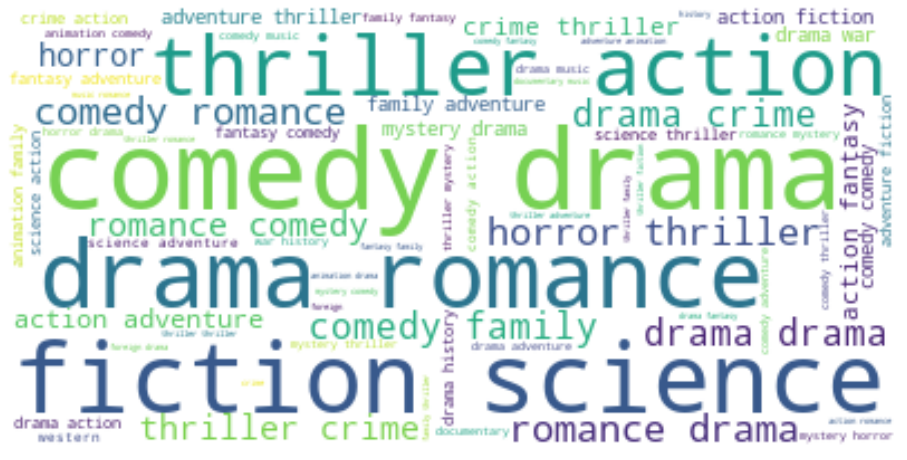

In [16]:
from wordcloud import WordCloud

list_genre = movies_df['genres'].tolist()
list_genre = list(itertools.chain(*list_genre))
genre = ' '.join(list_genre)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(genre)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

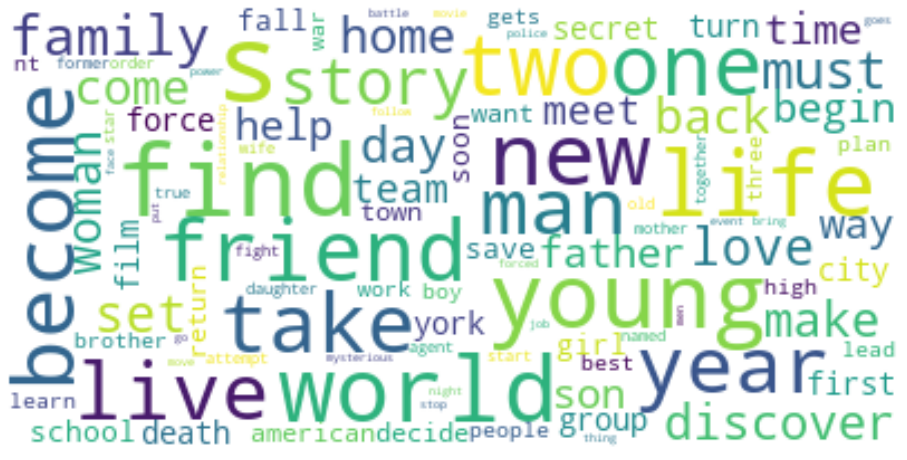

In [17]:
list_overview = movies_df['overview'].tolist()
list_overview = list(itertools.chain(*list_overview))
overview = ' '.join(list_overview)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(overview)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

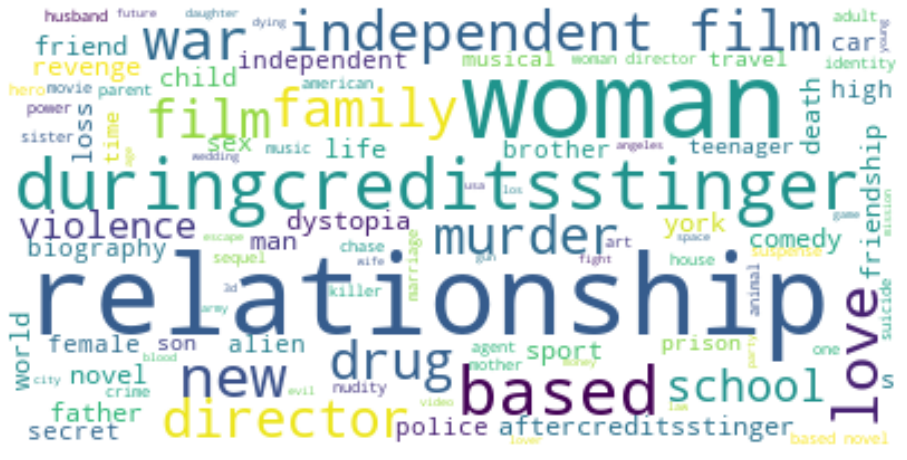

In [18]:
list_keyword = movies_df['keywords'].tolist()
list_keyword = list(itertools.chain(*list_keyword))
keyword = ' '.join(list_keyword)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(keyword)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import gensim
print('Loading KeyedVectors . . .')
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
print('Done loading KeyedVectors. . .')

movie_vocab_matrix = []
for list_ in movies_df.to_numpy():
    list_[2] = [word for word in list_[2] if word in wv.key_to_index]
    list_[3] = [word for word in list_[3] if word in wv.key_to_index]
    list_[0] = [word for word in list_[0] if word in wv.key_to_index]
    list_[5] = [word for word in list_[5] if word in wv.key_to_index]
    movie_vocab_matrix.append(list_)

Loading KeyedVectors . . .


In [ ]:
from tqdm import tqdm
def recommendation(title):
    movie_matrix_title_vocab = []
    for list_ in movies_df[movies_df['title'] == title].to_numpy():
        list_[3] = [word for word in list_[3] if word in wv.key_to_index]
        list_[2] = [word for word in list_[2] if word in wv.key_to_index]
        list_[0] = [word for word in list_[0] if word in wv.key_to_index]
        list_[5] = [word for word in list_[5] if word in wv.key_to_index]
        movie_matrix_title_vocab.append(list_)

    matrix_similarity = []
    pbar = tqdm(movie_vocab_matrix)
    for list1 in pbar:
        for list2 in movie_matrix_title_vocab:
            if not(len(list1[0])) or not(len(list1[3])) or not(len(list2[3])) or not(len(list1[2])) or not(len(list2[2])):
                continue
            score_catg = wv.n_similarity(list1[0], list2[0])
            score_keyword = wv.n_similarity(list1[2], list2[2])
            score_desc = wv.n_similarity(list1[3], list2[3])
            try:
                score_title = wv.n_similarity(list1[5], list2[5])/2
            except:
                score_title = 0
            if ((list1[4] != list2[4]) & (score_catg > 0.85)):
                matrix_similarity.append([list1[4], list2[4], score_title, score_catg, score_keyword, score_desc])
        pbar.update()
    pbar.close()
    movies_df_similarity = pd.DataFrame(matrix_similarity, columns = ['recommendation','title','score_title', 'score_category', 'score_keyword', 'score_description'])
    movies_df_similarity['final_score'] = movies_df_similarity['score_title'] + movies_df_similarity['score_category'] + movies_df_similarity['score_keyword'] + movies_df_similarity['score_description']
    return (movies_df_similarity.sort_values(by=['final_score', 'score_category', 'score_keyword', 'score_description', 'score_title'], ascending=False).head(10))

recommendation('Avatar')